In [1]:
import pandas as pd
import os
import folium
import geohash

In [2]:
SAFECAST_DATA_PATH = os.path.join('results', 'fukushima_grouped.csv')

df = pd.read_csv(SAFECAST_DATA_PATH)

df.head()


,geohash,value
0,xnecec,29.000000
1,xnecee,37.000000
2,xnecef,32.714286
3,xneceq,40.807692
4,xnecer,29.800000


In [3]:
df.sort_values(by="value", ascending=False)

,geohash,value
469,xnskbc,1129.540824
41,xneest,330.000000
38,xneese,330.000000
35,xneem5,329.000000
40,xneesr,329.000000
50,xnemet,329.000000
42,xneeu2,328.000000
39,xneesf,328.000000
36,xneemh,327.000000
43,xneeu6,325.000000


In [4]:
ghash = "xnececzvd"
geohash.bbox(ghash)

{'s': 36.83672904968262,
 'w': 140.44896125793457,
 'n': 36.836771965026855,
 'e': 140.4490041732788}

In [5]:

def get_coordinates(geo):
    bbox = geohash.bbox(geo)
    return [[bbox["w"], bbox["n"]], [bbox["e"], bbox["n"]], [bbox["e"], bbox["s"]], [bbox["w"], bbox["s"]]]
#     return [[0, 0], [0, 90], [90, 90], [90, 0]]

In [6]:
features = []

for geo, _ in df.values:
    features.append({"type": "Feature", "id": geo, 
                     "geometry": {"type": "Polygon", "coordinates": [get_coordinates(geo)]}})
    
features

[{'type': 'Feature',
  'id': 'xnecec',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[140.438232421875, 36.837158203125],
     [140.44921875, 36.837158203125],
     [140.44921875, 36.8316650390625],
     [140.438232421875, 36.8316650390625]]]}},
 {'type': 'Feature',
  'id': 'xnecee',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[140.42724609375, 36.84814453125],
     [140.438232421875, 36.84814453125],
     [140.438232421875, 36.8426513671875],
     [140.42724609375, 36.8426513671875]]]}},
 {'type': 'Feature',
  'id': 'xnecef',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[140.438232421875, 36.8426513671875],
     [140.44921875, 36.8426513671875],
     [140.44921875, 36.837158203125],
     [140.438232421875, 36.837158203125]]]}},
 {'type': 'Feature',
  'id': 'xneceq',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[140.416259765625, 36.8646240234375],
     [140.42724609375, 36.8646240234375],
     [140.42724609375, 36.859130859375],
     [140.4162597656

In [7]:

geo_data = {"type": "FeatureCollection", "features": features}


In [8]:
m = folium.Map(location=[37.760806, 140.474722], zoom_start=10)
 
# Add the color for the choropleth:
m.choropleth(
 geo_data=geo_data,
 name='choropleth',
 data=df,
 columns=['geohash', 'value'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Radiation level'
)
folium.LayerControl().add_to(m)

m

In [9]:
m.save("map.html")

In [10]:
SAFECAST_DATA_PATH = os.path.join('results', 'fukushima_filtered.csv')

df = pd.read_csv(SAFECAST_DATA_PATH)

df.head()

,captured time,latitude,longitude,value
0,2018-10-21 01:00:22,37.796306,140.514413,19.0
1,2018-10-21 01:00:16,37.723330,140.476797,15.0
2,2018-10-21 01:00:16,37.787500,140.552400,18.0
3,2018-10-21 01:00:16,37.796306,140.514413,61.0
4,2018-10-21 01:00:14,37.792805,140.930957,13.0


In [11]:
df["captured time"] = pd.to_datetime(df["captured time"], errors="coerce")
df_count = df.groupby(df['captured time'].dt.date).count()[["captured time"]]
df_count

,captured time
captured time,
2018-08-27,171
2018-09-19,3945
2018-09-25,2180
2018-09-27,6823
2018-09-28,2793
2018-09-30,4
2018-10-01,9806
2018-10-02,10125
2018-10-03,10083


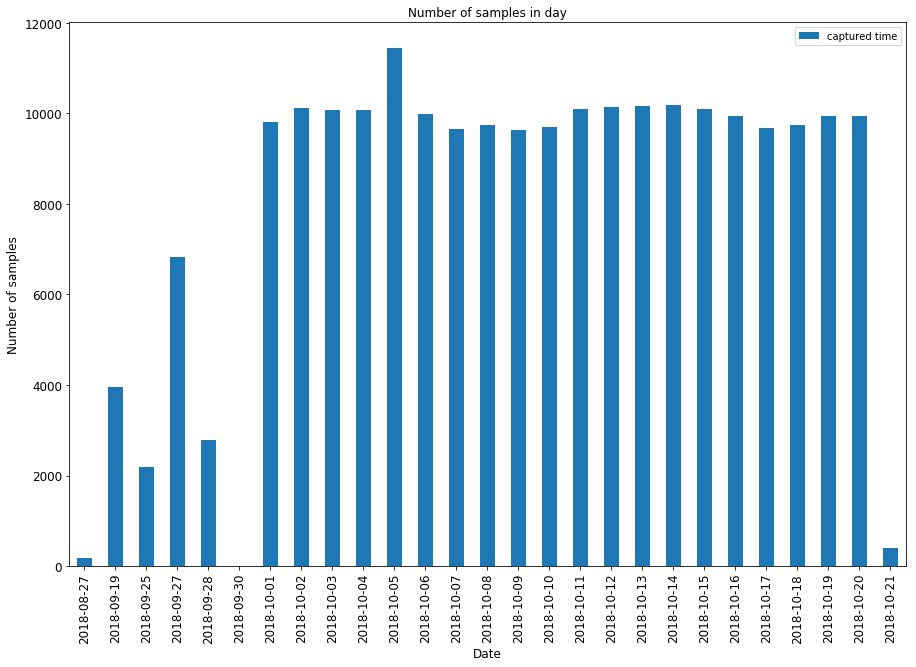

In [13]:
import matplotlib.pyplot as plt

ax = df_count.plot(kind='bar', title = 'Number of samples in day', figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Number of samples", fontsize=12)
plt.show()


In [14]:
df["captured time"] = pd.to_datetime(df["captured time"], errors="coerce")
df_mean = df[['captured time', 'value']].groupby(df['captured time'].dt.date).mean()
df_mean

,value
captured time,
2018-08-27,35.918129
2018-09-19,41.079341
2018-09-25,50.981193
2018-09-27,39.911769
2018-09-28,42.667383
2018-09-30,1088.750000
2018-10-01,71.736896
2018-10-02,70.971556
2018-10-03,69.749083


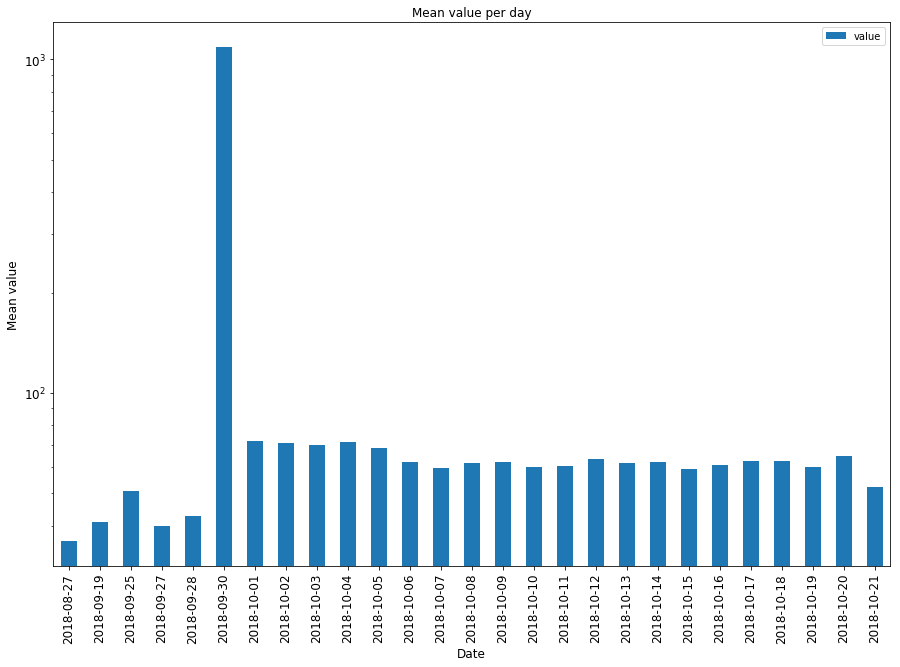

In [15]:
ax = df_mean.plot(kind='bar', title = 'Mean value per day', figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Mean value", fontsize=12)
ax.set_yscale("log", nonposy='clip')
plt.show()

In [16]:
df["captured time"] = pd.to_datetime(df["captured time"], errors="coerce")
df_std_dev = df[['captured time', 'value']].groupby(df['captured time'].dt.date).std()
df_std_dev

,value
captured time,
2018-08-27,5.193239
2018-09-19,8.863401
2018-09-25,10.944187
2018-09-27,9.767623
2018-09-28,9.805888
2018-09-30,547.054156
2018-10-01,200.645453
2018-10-02,199.809939
2018-10-03,195.771687


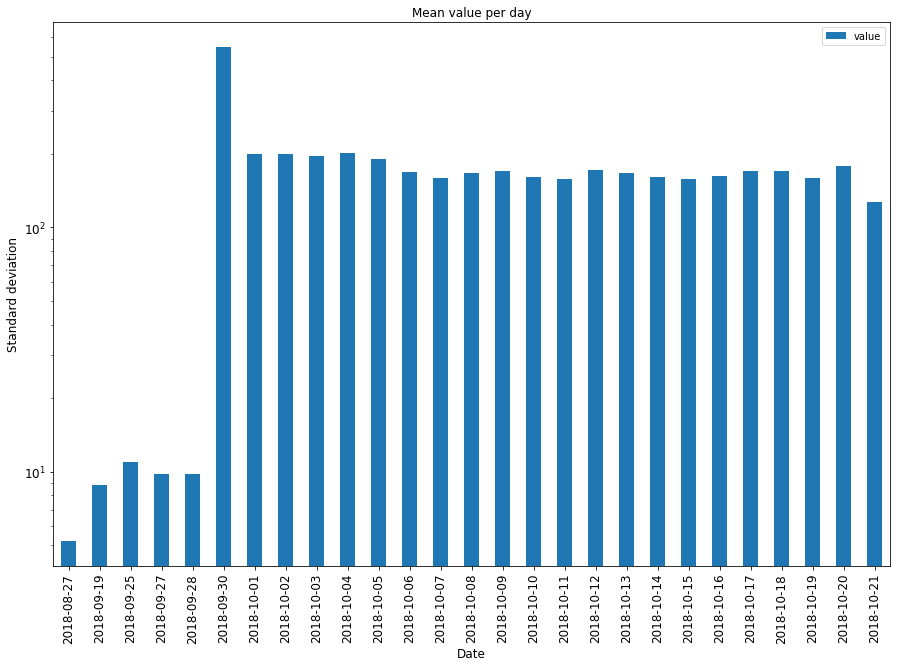

In [17]:
ax = df_std_dev.plot(kind='bar', title = 'Mean value per day', figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Standard deviation", fontsize=12)
ax.set_yscale("log", nonposy='clip')
plt.show()